In [6]:
from micrograd import Variable

In [7]:
import graphviz
print(graphviz.__version__)  # Check that the package is accessible


0.20.3


For plotting the graph

In [8]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [16]:
x = Variable(3, label= 'x')
y = Variable(4, label= 'y')
f = x**3 + y**2 + x + y ; f.label = 'f'
f

Variable(data=50)

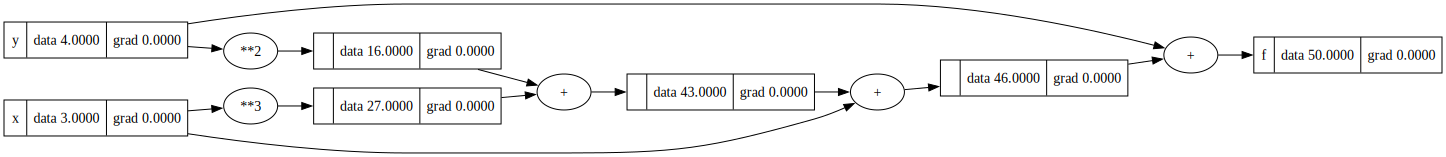

In [17]:
draw_dot(f)

In [18]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(f)
topo

[Variable(data=4),
 Variable(data=3),
 Variable(data=16),
 Variable(data=27),
 Variable(data=43),
 Variable(data=46),
 Variable(data=50)]

In [39]:
for node in topo:
    node.grad = 0
f.grad = 1
for node in topo:
    node._backward()

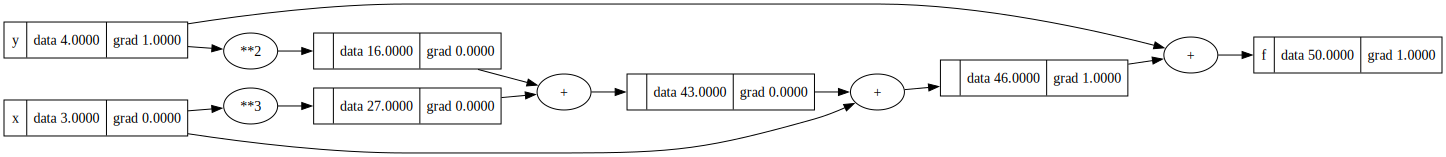

In [40]:
draw_dot(f)